# Mix (Background: Gamma, Signal: Gaussian)
- Translation
- Scaling
- Rotation
- Box
***

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

## Directories

In [2]:
model_dir = 'sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../Data_Generator")

***
# 0 - Generate Data
***

**Imports**

In [4]:
from data_loader import get_settings_from_json
from data_generator_all_systematics import DataGenerator

In [5]:
data_gen_settings = get_settings_from_json('data_jsons/all_systematics_normal_gamma_copulas')
for index, settings in enumerate(data_gen_settings):
    data_gen = DataGenerator(settings_dict=settings)
    data_gen.generate_data()
    data_gen.save_data(directory="sample_data", file_index=index+1)
    

***
# 1 - Import Data
***

In [6]:
from data_io import load_data, show_data_statistics, write

In [7]:
data_name = 'fair_universe_challenge'
data_dir = 'sample_data' 

In [8]:
train_sets, test_sets, settings = load_data(data_dir, load_settings=True)



###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  sample_data
[*] train data dir :  sample_data/train/data
[*] train labels dir :  sample_data/train/labels
[*] test data dir :  sample_data/test/data
[*] test labels dir :  sample_data/test/labels
[*] settings dir :  sample_data/settings
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] settings dir found
[+] 12 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------




**Data Visualization**

In [9]:
from visualize import (
    visualize_decicion_boundary,
    visualize_augmented_data,
    visualize_data,
    visualize_clocks,
    visualize_score,
    visualize_roc_curves
)

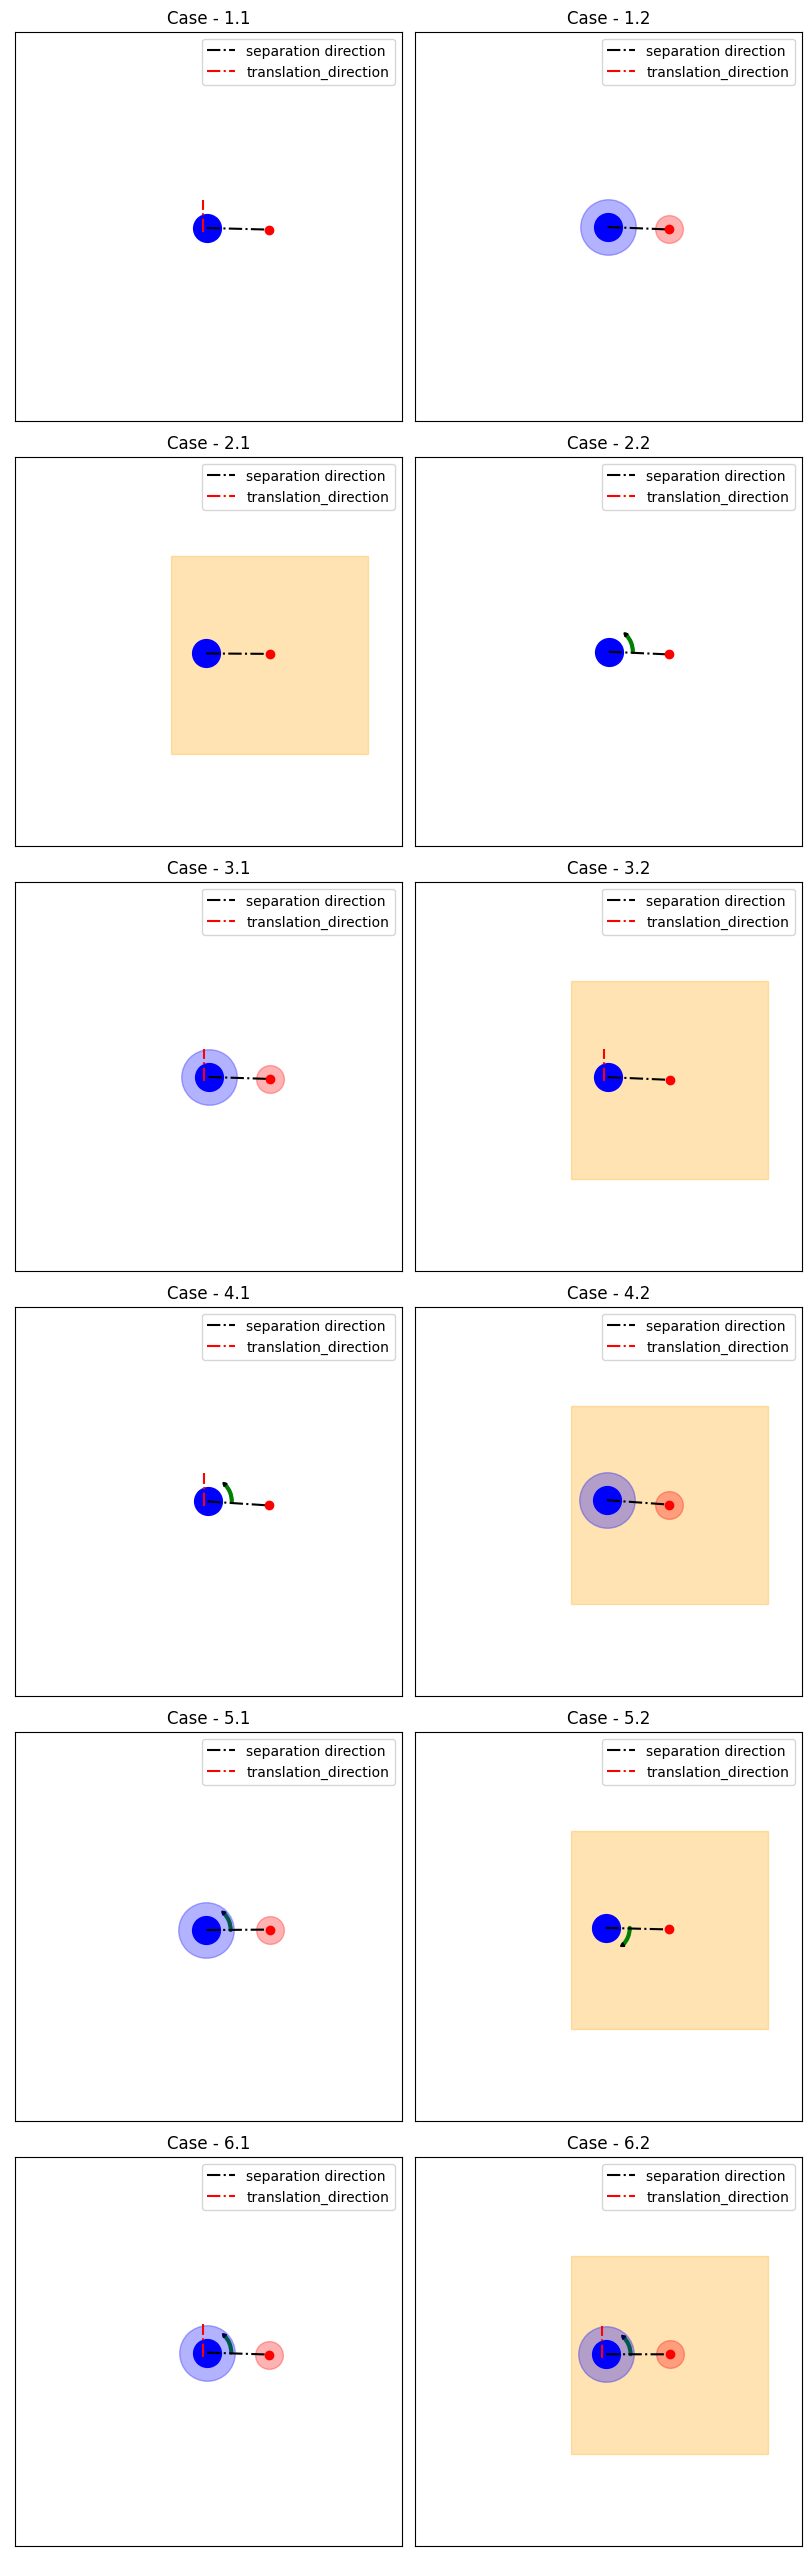

In [10]:
visualize_clocks(settings, xylim=[-4, 20])

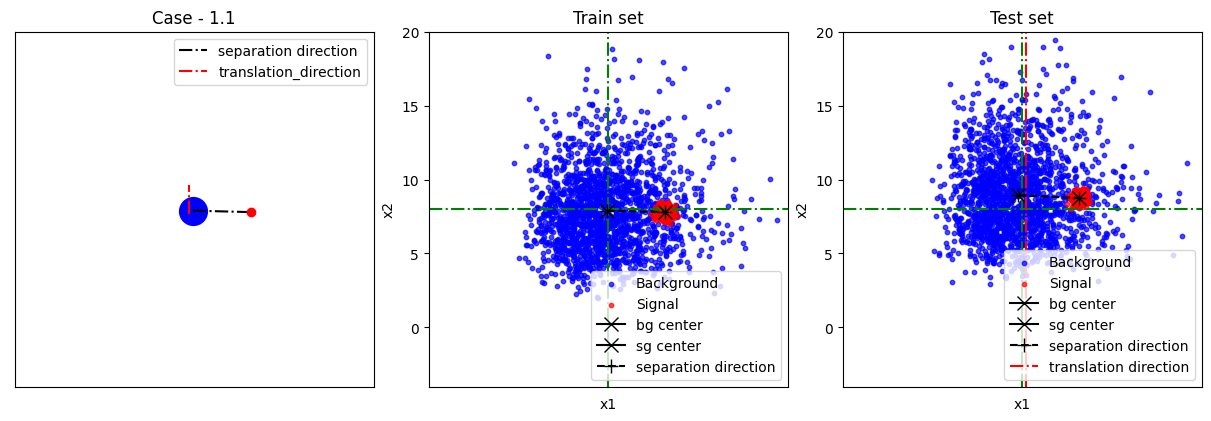

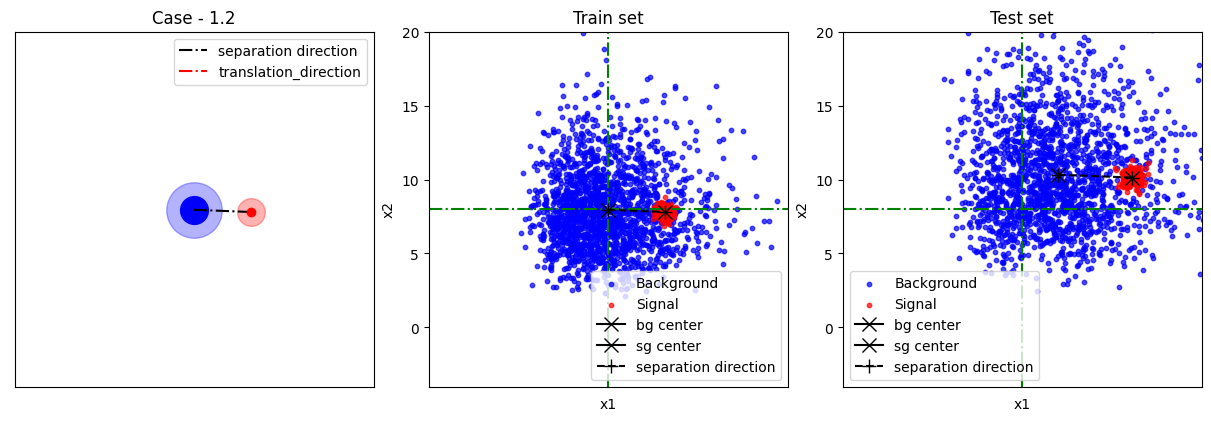

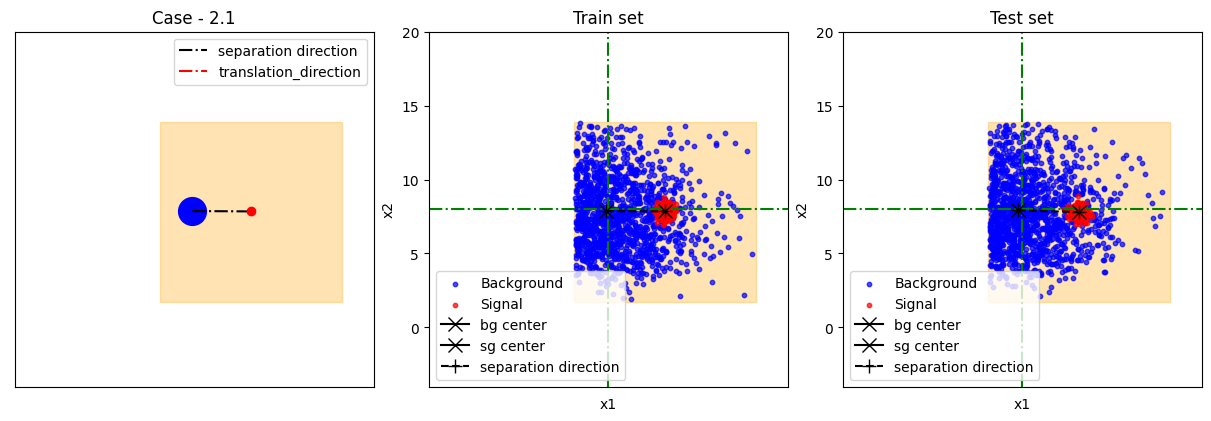

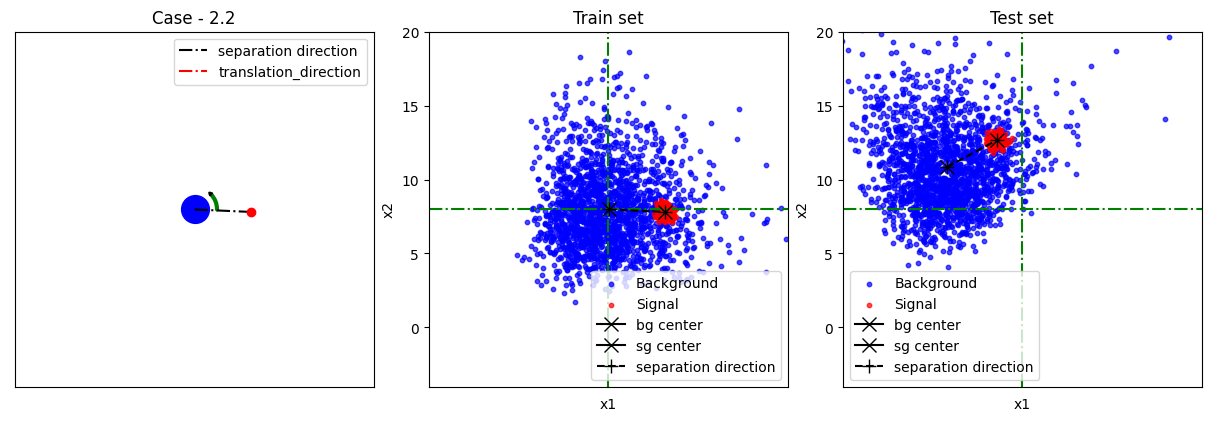

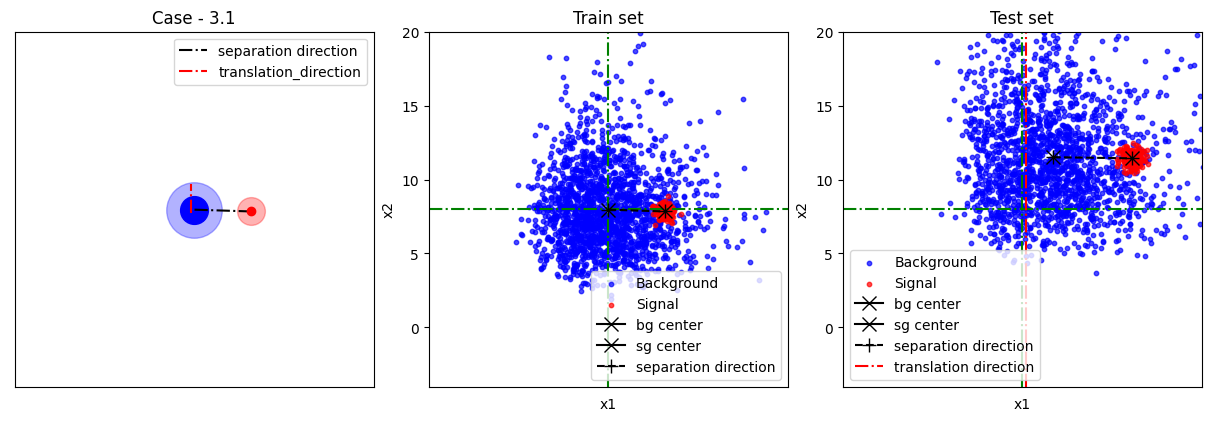

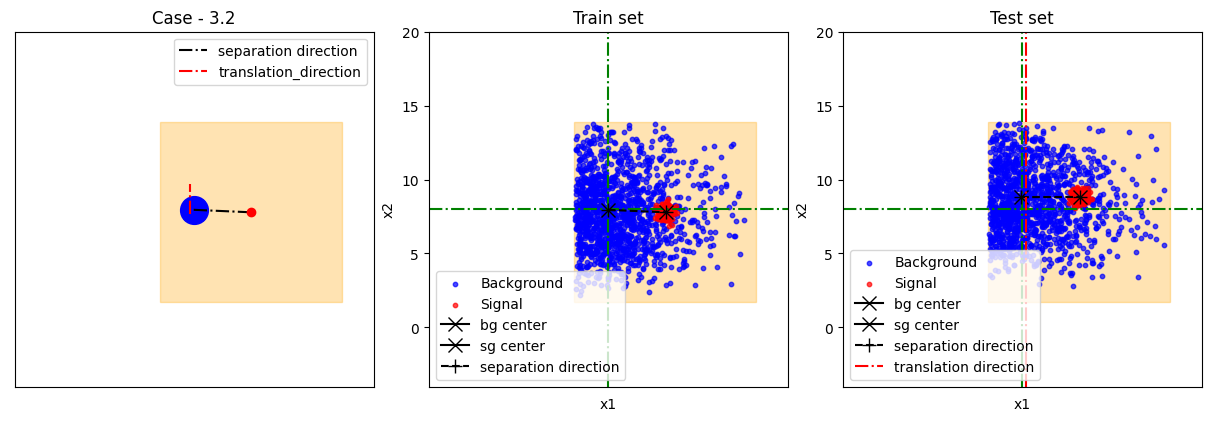

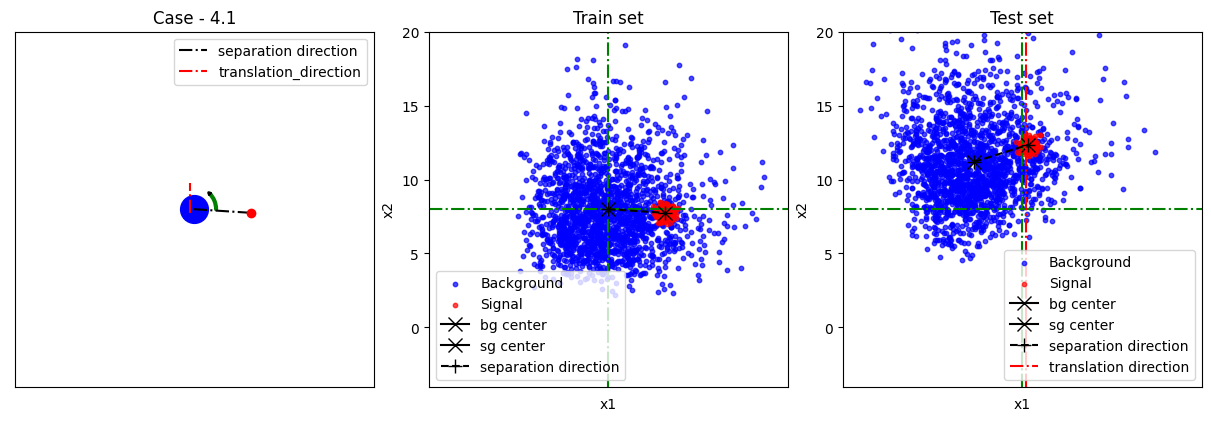

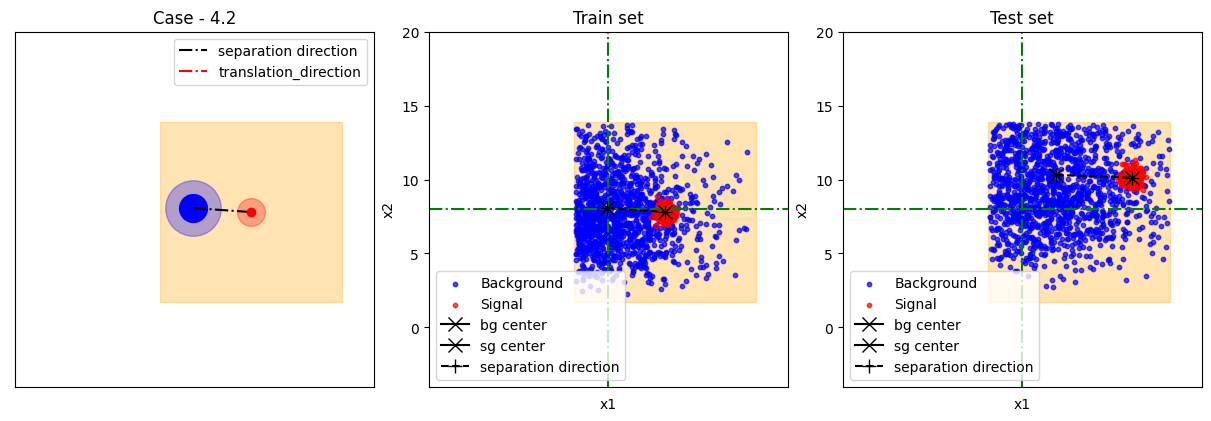

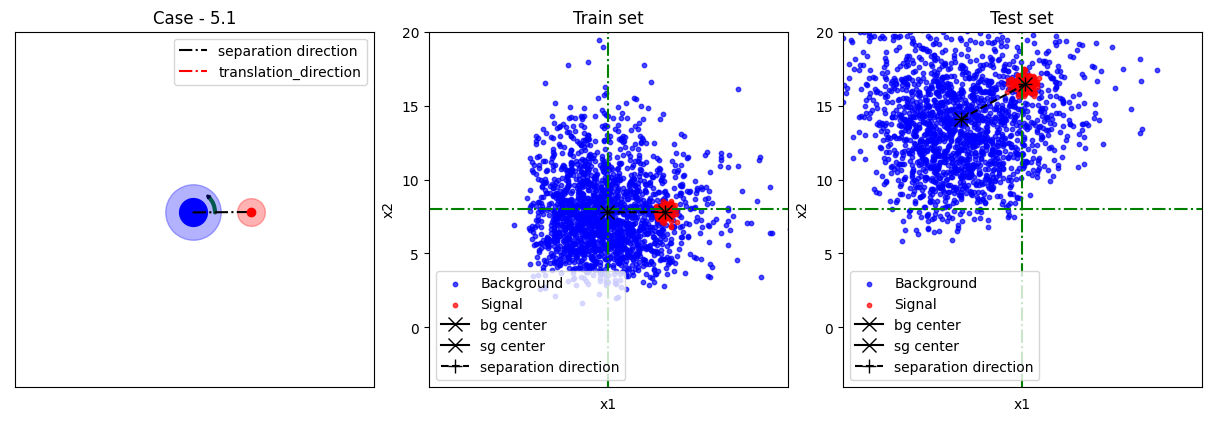

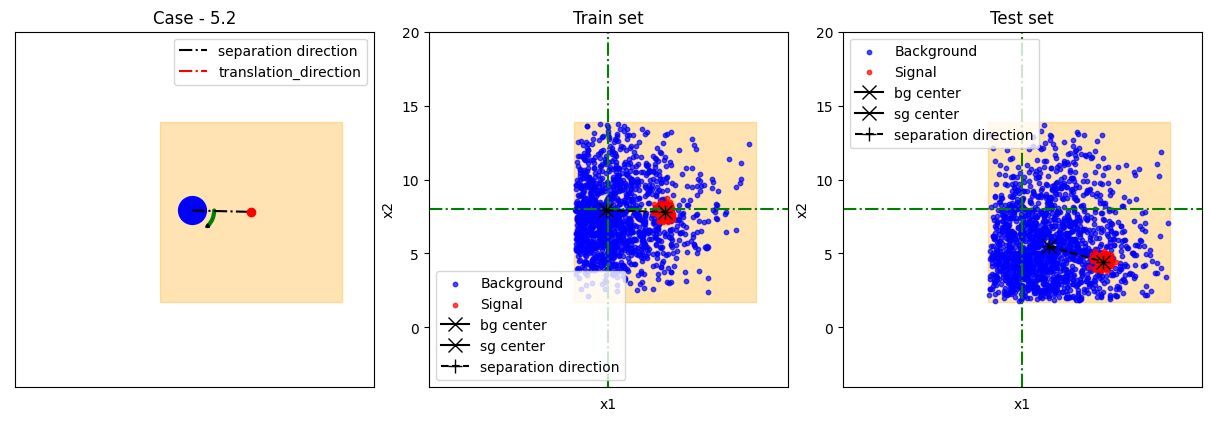

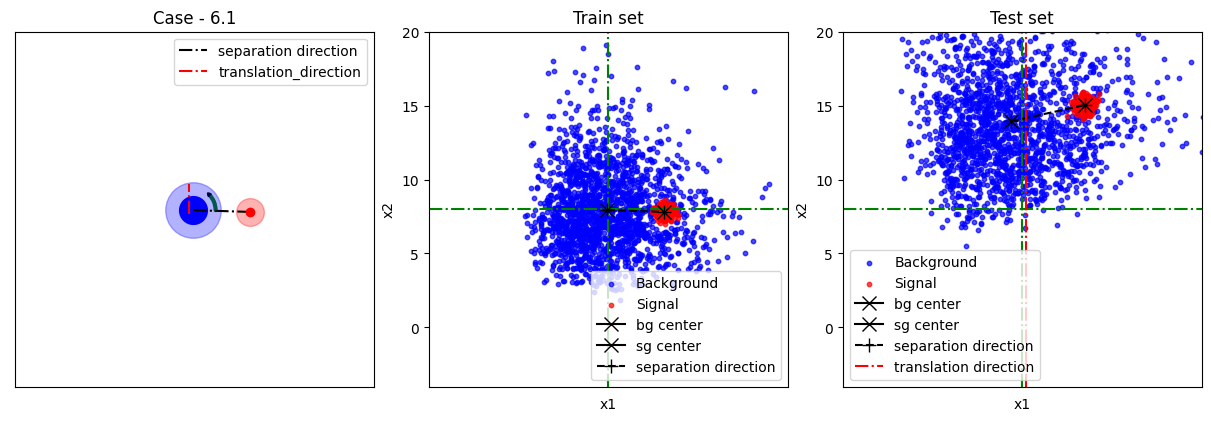

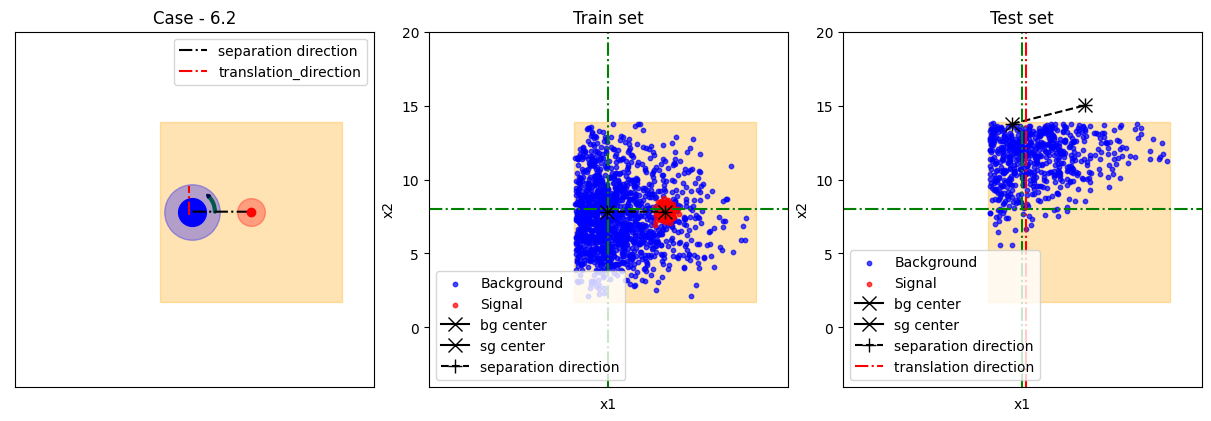

In [11]:
for index, _ in enumerate(train_sets):
    visualize_data(settings[index], train_sets[index], test_sets[index], [-4,20])
    